In [4]:
import numpy as np
from scipy.optimize import linprog

N = 2
Player1 = ['No Attack', 'Low Attack', 'High Attack']
Player2 = ['No Defense', 'Low Defense', 'High Defense']

strategies = np.meshgrid(*[Player1, Player2])
strategies_global = np.array(strategies).T.reshape(-1, N)


def saddle_point(a,strategies=strategies_global) :

    min_vals = np.amin(a, axis=1)
    max_vals = np.amax(a, axis=0)
    maxmin = np.max(min_vals)
    minmax = np.min(max_vals)

    if maxmin != minmax :
        print("No saddle point exists.............")
    else :
        
        saddle_points = "{"
        indices = np.argwhere(a == maxmin)
        for row in indices :
            saddle_points += "(" + str(row[0]+1) + "," +str(row[1]+1) + ")"
        
        saddle_points += "}"
        print("Saddle points are : ", saddle_points)

def msne(a,strategies=strategies_global) :
    #for player 1
    ## One zero array for later (z, x)
    ess1 = np.ones(a.shape[0]+1)
    ess1[0] = 0
    c1 = -1*(1-ess1)  ##[-1, 0 ,0 ,0] -1 coeff for z and 0 for x (Max z == min(-z))
    A_ub1 = np.concatenate((np.ones((1, a.shape[1])), -1*a), axis=0).T
    B_ub1 = np.zeros(a.shape[1])
    A_eq1= np.expand_dims(ess1, axis=0)
    B_eq1 = np.ones(1)
    bounds = [(None, None)] + [(0,1)]*a.shape[0]
    result1 = linprog(c1, A_ub=A_ub1, b_ub=B_ub1, A_eq=A_eq1, b_eq=B_eq1, bounds=bounds)
    p1_val, p1_distribution = result1.x[0], result1.x[1:]

    ## For 2nd player distribution
    ess2= np.ones(a.shape[1]+1)
    ess2[0] = 0
    c2 = (1-ess2)
    A_ub2 = np.concatenate((-1*np.ones((a.shape[0], 1)), a), axis=1)
    B_ub2 = np.zeros(a.shape[0])
    A_eq2= np.expand_dims(ess2, axis=0)
    A_eq2 = np.concatenate((A_eq2, 1-A_eq2), axis=0)
    B_eq2 = np.array([1, p1_val]) ## Dual Principle w* = z*
    bounds = [(None, None)] + [(0,1)]*a.shape[1]
    result2 = linprog(c2, A_ub=A_ub2, b_ub=B_ub2, A_eq=A_eq2, b_eq=B_eq2, bounds=bounds)
    p2_val, p2_distribution = result2.x[0], result2.x[1:]

    print("MSNE are : {", tuple(p1_distribution), "," ,tuple(p2_distribution), "}")

def analyse(utilities,strategies=strategies_global) :
    # saddle_point(strategies, utilities[0])
    print(utilities.shape[0])
    for i in range(utilities.shape[0]):
        msne(utilities[i])

# utilities = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])


utilities=np.array([[(0.58404992, 0.32749194), (0.13552401,0.58404992), (0.32749194, 0.13552401)],
       [(0.58404992, 0.32749194), (0.13552401,0.86573989), (0.47477729, 0.86201378)],
      [(0.58404992, 0.32749194), (0.13552401,0.71083058), (0.33442823, 0.95073222)]])
# # print(utilities.shape)
analyse(utilities)



3
MSNE are : { (0.6361312694295141, 0.36386873057048574, 0.0) , (0.36386873057048547, 0.6361312694295146) }
MSNE are : { (0.6014908608954034, 0.0, 0.3985091391045966) , (0.830267833769992, 0.16973216623000797) }
MSNE are : { (0.7060726795096823, 0.0, 0.29392732049031767) , (0.7140192853172419, 0.28598071468275815) }


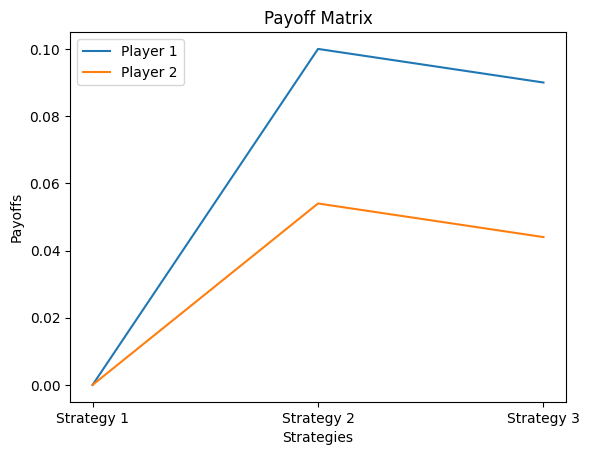

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the payoff matrix
payoff_matrix = np.array([[[0,0], [0, -0.23], [0, 0.32]], 
                          [[0.1, -0.55], [0.05400000000000002, -0.67], [0.031, -0.7050000000000001]], 
                          [[0.09, -0.55], [0.04400000000000001, -0.67], [0.02099999999999999, -0.615]]])

# Plot the matrix as a line graph
x = np.arange(3)
for i in range(2):
    plt.plot(x, payoff_matrix[:,i,0], label=f'Player {i+1}')
plt.legend()
plt.xticks(x, ['Strategy 1', 'Strategy 2', 'Strategy 3'])

# Add axis labels and a title
plt.xlabel('Strategies')
plt.ylabel('Payoffs')
plt.title('Payoff Matrix')

# Show the plot
plt.show()